<a href="https://colab.research.google.com/github/SudheerReddyBandi/Agriculture/blob/main/Regression_combine_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# regression knn

In [ ]:
# Import necessary librariesz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


# Load the dataset
uploaded_file_path = "/content/SoilAndCrop1.csv"
df = pd.read_csv(uploaded_file_path)

In [ ]:
#df.head

In [ ]:
# Data preprocessing
label_encoder = LabelEncoder()
df['Crop_Type'] = label_encoder.fit_transform(df['Crop_Type'])
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])
df['Disease_Status'] = label_encoder.fit_transform(df['Disease_Status'])

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(['ID', 'Yield'], axis=1)
y = df['Yield']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=2)

In [ ]:
# Train the regressor
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

In [ ]:
# Calculate absolute error and squared error as a percentage of actual values
absolute_error_percentage = (mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100
squared_error_percentage = (mean_squared_error(y_test, y_pred) / (y_test.mean() ** 2)) * 100

print("Mean Absolute Error (%):", absolute_error_percentage)
print("Mean Squared Error (%):", squared_error_percentage)

Mean Absolute Error (%): 7.977630677927413
Mean Squared Error (%): 2.9974544057646364


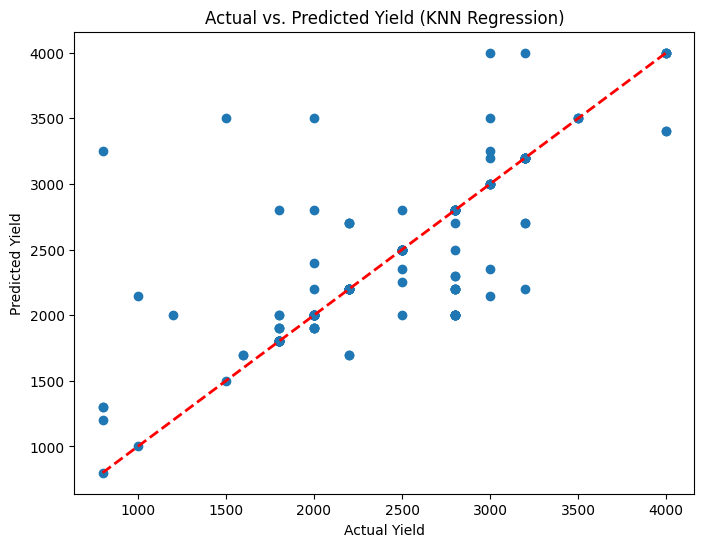

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs. Predicted Yield (KNN Regression)')
plt.show()

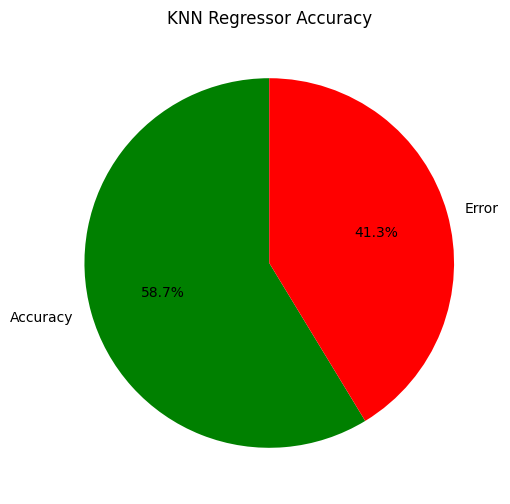

In [ ]:

# Create a pie chart to visualize accuracy
accuracy_percentage = knn_regressor.score(X_test, y_test) * 100  # Use model's score for accuracy
labels = ['Accuracy', 'Error']
sizes = [accuracy_percentage, 100 - accuracy_percentage]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('KNN Regressor Accuracy')
plt.show()

# **SVR**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
uploaded_file_path = "/content/SoilAndCrop1.csv"  # Replace with the actual path
df = pd.read_csv(uploaded_file_path)



In [ ]:
# Separate numerical and categorical features
numerical_features = df.drop(['ID', 'Yield', 'Crop_Type', 'Soil_Type', 'Disease_Status'], axis=1)
categorical_features = df[['Crop_Type', 'Soil_Type', 'Disease_Status']]

In [ ]:
# One-hot encode categorical features
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_features[['Crop_Type', 'Soil_Type', 'Disease_Status']]).toarray()


In [ ]:

# Concatenate numerical and encoded categorical features
X = pd.concat([numerical_features, pd.DataFrame(categorical_encoded)], axis=1)
y = df['Yield']



In [ ]:
# Convert all feature names to strings
X.columns = X.columns.astype(str)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Support Vector Regression model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)


In [ ]:
# Train the model
svr_model.fit(X_train, y_train)


SVR(C=100)

In [ ]:
# Make predictions
y_pred = svr_model.predict(X_test)

In [ ]:
# Calculate absolute error and squared error as a percentage of actual values
absolute_error_percentage = (mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100
squared_error_percentage = (mean_squared_error(y_test, y_pred) / (y_test.mean() ** 2)) * 100

print("Mean Absolute Error (%):", absolute_error_percentage)
print("Mean Squared Error (%):", squared_error_percentage)

Mean Absolute Error (%): 21.822550978992076
Mean Squared Error (%): 7.5587764599104545


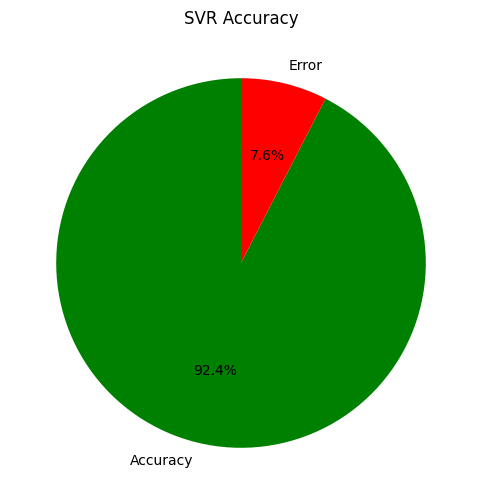

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Calculate accuracy for pie chart
accuracy_percentage = 100 - squared_error_percentage  # Assuming lower error is better

# Create a pie chart to visualize accuracy
labels = ['Accuracy', 'Error']
sizes = [accuracy_percentage, 100 - accuracy_percentage]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('SVR Accuracy')
plt.show()

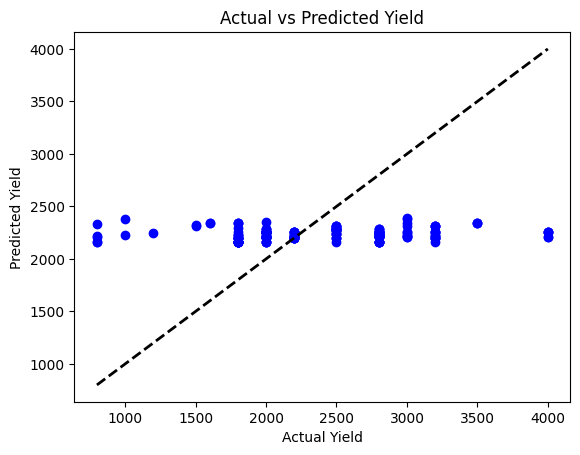

In [ ]:
# Plot predicted vs actual yield
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

# **Ridge**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
uploaded_file_path = "/content/SoilAndCrop1.csv"  # Replace with the actual path
df = pd.read_csv(uploaded_file_path)

In [ ]:
# Separate numerical and categorical features
numerical_features = df.drop(['ID', 'Yield', 'Crop_Type', 'Soil_Type', 'Disease_Status'], axis=1)
categorical_features = df[['Crop_Type', 'Soil_Type', 'Disease_Status']]

In [ ]:
# One-hot encode categorical features
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_features[['Crop_Type', 'Soil_Type', 'Disease_Status']]).toarray()

In [ ]:
# Concatenate numerical and encoded categorical features
X = pd.concat([numerical_features, pd.DataFrame(categorical_encoded)], axis=1)
y = df['Yield']

In [ ]:
# Convert all feature names to strings
X.columns = X.columns.astype(str)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

In [ ]:
# Train the model
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Make predictions
y_pred = ridge_model.predict(X_test)

In [ ]:
# Calculate absolute error and squared error as a percentage of actual values
absolute_error_percentage = (mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100
squared_error_percentage = (mean_squared_error(y_test, y_pred) / (y_test.mean() ** 2)) * 100

print("Mean Absolute Error (%):", absolute_error_percentage)
print("Mean Squared Error (%):", squared_error_percentage)

Mean Absolute Error (%): 10.626153736271041
Mean Squared Error (%): 2.201860211224787


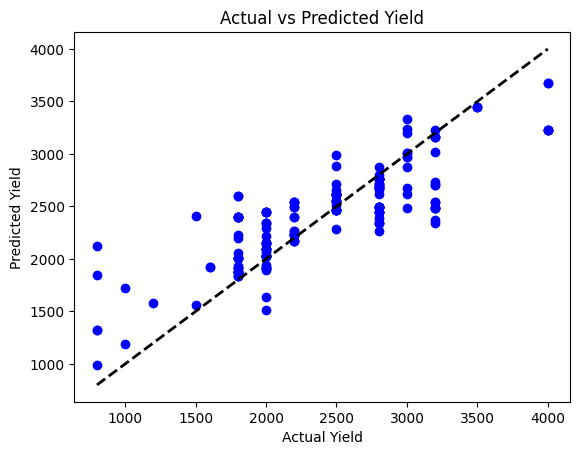

In [ ]:
# Plot predicted vs actual yield
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

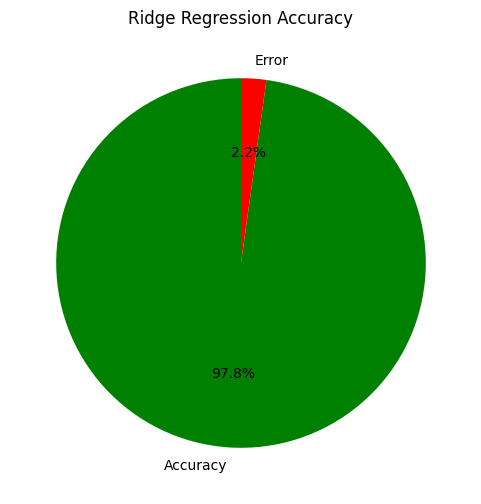

In [ ]:
# Calculate accuracy percentage for pie chart
accuracy_percentage = (1 - squared_error_percentage / 100) * 100

# Create a pie chart to visualize accuracy
labels = ['Accuracy', 'Error']
sizes = [accuracy_percentage, 100 - accuracy_percentage]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Ridge Regression Accuracy')
plt.show()

# **Polynomial**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
file_path = '/content/SoilAndCrop1.csv'
df = pd.read_csv(file_path)


In [ ]:
# Select relevant features and target variable
features = df[['Soil_Moisture', 'Soil_pH', 'Temperature', 'Humidity']]
target = df['Yield']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Polynomial Regression
degree = 2  # You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test_poly)

In [ ]:
# Calculate errors and accuracy
absolute_error = metrics.mean_absolute_error(y_test, y_pred)
squared_error_percentage = np.mean(np.square((y_test - y_pred) / y_test)) * 100
accuracy = 100 - squared_error_percentage

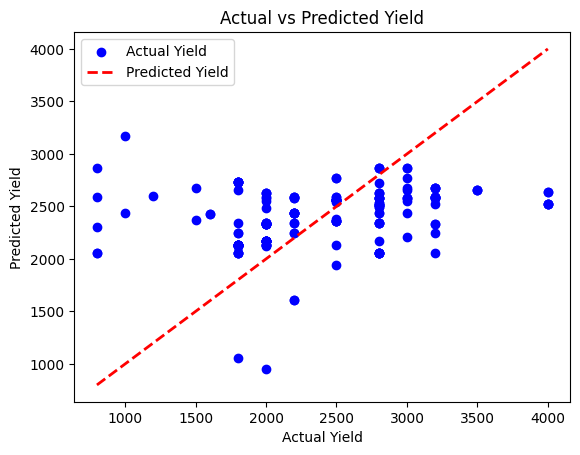

In [ ]:
plt.scatter(y_test, y_pred, c='blue', label='Actual Yield')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.legend()
plt.show()

In [ ]:
# Display errors and accuracy
print(f'Absolute Error: {absolute_error}')
print(f'Squared Error Percentage: {squared_error_percentage}%')
print(f'Accuracy: {accuracy}%')

Absolute Error: 481.74274615382524
Squared Error Percentage: 20.214748121483773%
Accuracy: 79.78525187851622%


# **ANN**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the dataset
uploaded_file_path = "/content/SoilAndCrop1.csv"  # Replace with the actual path
df = pd.read_csv(uploaded_file_path)

In [ ]:
numerical_features = df.drop(['ID', 'Yield', 'Crop_Type', 'Soil_Type', 'Disease_Status'], axis=1)
categorical_features = df[['Crop_Type', 'Soil_Type', 'Disease_Status']]

In [ ]:
# One-hot encode categorical features
categorical_features_encoded = pd.get_dummies(categorical_features)

In [ ]:

# Concatenate numerical and encoded categorical features
X = pd.concat([numerical_features, categorical_features_encoded], axis=1)
y = df['Yield']



In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and build the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)



In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()


6/6 [==============================] - 0s 5ms/step


In [ ]:

# Calculate absolute error and squared error as a percentage of actual values
absolute_error_percentage = (mean_absolute_error(y_test, y_pred) / y_test.mean()) * 100
squared_error_percentage = (mean_squared_error(y_test, y_pred) / (y_test.mean() ** 2)) * 100

print("Mean Absolute Error (%):", absolute_error_percentage)
print("Mean Squared Error (%):", squared_error_percentage)

Mean Absolute Error (%): 11.371675924959858
Mean Squared Error (%): 3.5338462233900705


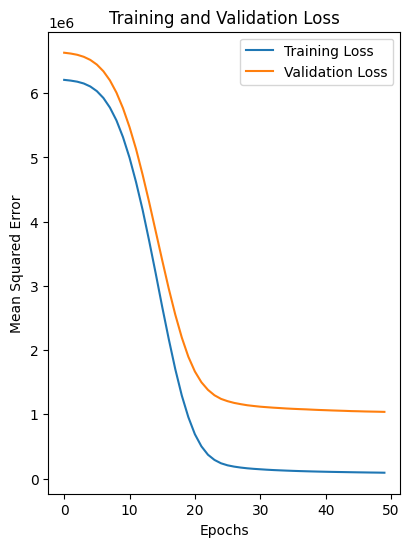

In [ ]:
# Plotting expected vs actual error
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()



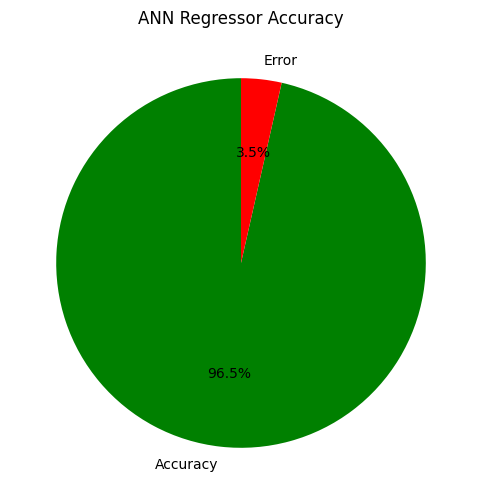

In [ ]:
# Create a pie chart to visualize accuracy
accuracy_percentage = 100 - squared_error_percentage  # Since we are using mean squared error
labels = ['Accuracy', 'Error']
sizes = [accuracy_percentage, 100 - accuracy_percentage]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('ANN Regressor Accuracy')
plt.show()

# **Comparison among regression**

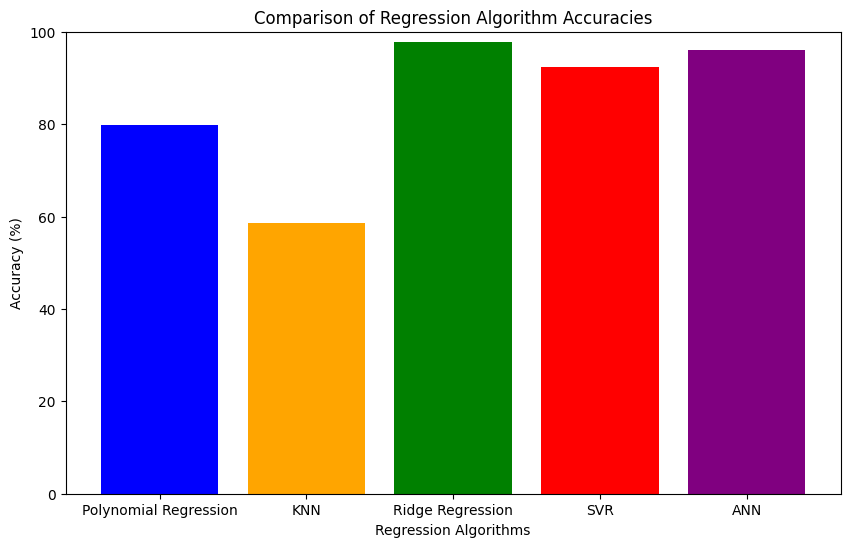

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for different regression algorithms
algorithms = ['Polynomial Regression', 'KNN', 'Ridge Regression', 'SVR', 'ANN']
accuracies = [79.8, 58.7, 97.8, 92.4, 96.1]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 100)
plt.xlabel('Regression Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Algorithm Accuracies')
plt.show()


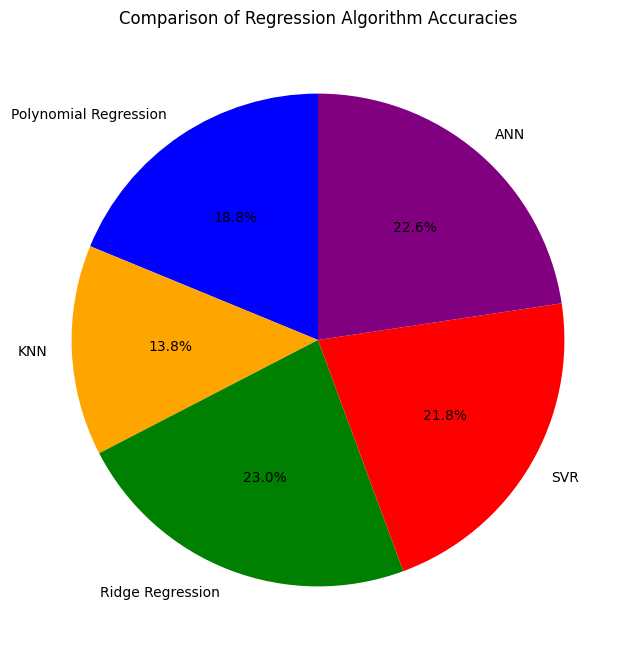

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=algorithms, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Comparison of Regression Algorithm Accuracies')
plt.show()